# Exploring Mechanisms Of Co-Existence Amongst Diverse Plankton  

**Jannitta Yao, Gael Forget, and Mick Follows**

In this notebook we look into the following questions:

* What sustains so much diversity in the Ocean's phytoplankton populations?
  * *G.E. Hutchinson, The Paradox of the Plankton, Am. Nat., 95, 137-145 (1961)*
* Can we build simple, conceptual models that can maintain and explain co-existence of different phenotypes?
  * *D. Tilman, Resource competition and community structure, Princeton (1982)*

Hutchinson (1961) noted that the simplest models of plankton communities lead to low diversity with one "best-adapted" species outcompeting all others, strongly contrasting with the high degree of co-existence and diversity observed in natural populations.

In this exercise we use simple representations of diverse phytoplankton types, each with different characteristics, competing for a limited number of resources. We test the hypothesis that specialization on different resources can promote co-existence.

To do so, we formulate a model of time-dependent populations in a reaction chamber, or chemostat, in which we can control the growth rate and other properties of the system. We can explore both steady-state and time-dependent solutions.

In each of the exercises, you will configure a chemostat plankton model with different numbers of phytoplankton species and limiting nutrients.

1. **1 species of phytoplankton & 1 limiting resource**: Brief introduction to the [Julia](https://docs.julialang.org/en/v1/) programming language and detailed instructions to walk you through the basic chemostat model configuration.
2. **2 species of phytoplankton & 1 limiting resource**: Build on the skills obtained from Exercise #1 and add a level of complexity by increasing the number of species of phytoplankton.
3. **2 species of phytoplankton & 2 limiting resources**:  Increase the number of resources to 2. This exercise has the least amount of instruction and builds on the previous two notebooks.

Use the Table of Contents on the side bar to navigate through the different exercises. Press the `Run` button on the menu bar to advance through the code and text blocks. Edit the code by clicking on the cell. NextJournal displays the output of the last line of code within each cell. To hide this output, you can add a semi-colon to the last line of code. 

# 1. One species of phytoplankton and one limiting resource

Using Monod kinetics, we can simulate the growth of a single species of phytoplankton limited by a single limiting resource. Monod kinetics lead to the following equations to model the rate of change in N (nutrient) and B (phytoplankton biomass) over time:

$$
\begin{equation} 
\frac{dN}{dt}=-\mu\frac{N}{N+k}B+D(N_{i}-N) 
\end{equation} 
\hspace{15pt} [A.1]
$$
$$
\begin{equation}
\frac{dB}{dt}=\mu\frac{N}{N+k}B-DB
\end{equation}
\hspace{57pt} [A.2]
$$
In this exercise, you will use Euler's method and these two equations to model the behavior of a single species of phytoplankton with one limiting resource.

## **Step 1.0: Import appropriate Julia packages**

In [1]:
using Plots

## **Step 1.1: Set up the time interval**

We want to observe the behavior of our chemostat model over the course of 150 days with an interval of 0.1 days.

*Your task*: Create three variables. Variable names are in parentheses after each step.

1. Set the timestep interval ($\Delta$*t*)
2. Set the max number of days (*max_days*)
3. Calculate the number of steps needed for timestepping using **max_days** and $\Delta t$ (*nstepmax*)

*Note*: Remove or add a semicolon after the last line of code in this cell to see what happens.

In [2]:
# (1.1) timestep
Δt = 0.2

# (1.2) max days
max_days = 150

# (1.3) number of steps to timestep
nstepmax = max_days/Δt

# Calculates the interval needed to plot the data points
N_out = 0.5/Δt;

## **Step 1.2: Set up phytoplankton characteristics**

*Your task*: Create three variables. 

1. Set the maximum growth rate per day to 0.5 ($\mu$)
2. Set the dilution rate per day to 0.2 ($D$)
3. Set the half-saturation constant to 0.1 ($k$). This represents the concentration at which half of the maximum intake rate is reached.

In [3]:
# (2.1) maximum growth rate (day -1)
μ = 0.5

# (2.2) dilution rate (day -1)
D = 0.2

# (2.3) half-saturation constant, K (micromol/liter)
k = 0.1;

## **Step 1.3: Set up incoming nutrient and initial phytoplankton**

*Your task*: Create two variables.

1. Set the incoming resource concentration to 1.0 ($N_i$)
2. Set the initial phytoplankton concentration to 0.002 ($B$)

Later, you will create a plot of the phytoplankton and nutrient concentrations against time. You will then adjust the limiting resources and phytoplankton concentrations to see how they impact results.

In [4]:
# (3.1) incoming resource concentration (micromol -1)
Nᵢ = 1.0

# (3.2) initial phytoplankton concentration (micromol -1)
B = 0.002;

**Initialize time and arrays used later**

*The following steps have been implemented for you; just push Run.*

Here we set the initial time ($t_0$) to 0.0 and use Julia's built-in `Array` type to create three empty arrays (*B_store, N_store, t_store*) of floating point numbers in order to store model data later.

In [5]:
t₀ = 0.0
B_store = Float64[]
N_store = Float64[]
t_store = Float64[];

## **Step 1.4: Create a function to calculate nutrient changes over time**

Functions are self-contained blocks of code that accomplish a specific task. Functions usually take in data, process it, and return an output. Please refer to [Julia's function documentation](https://docs.julialang.org/en/v1/manual/functions/index.html) if you would like to read more about functions and their syntax in Julia.

Example function:

`function sum(x,y)
    return x + y
end
`

Above, function `sum` is defined to take in 2 input arguments, x and y, and return their sum.

Example function call:

`z = sum(2,3)
`

Above, the variable **z** is set to the result of `sum` with input parameters 2 and 3 in the example. 

Below, the `dNdt` function implements the equation for $\frac{dN}{dt}$. Later on, in Step 1.5, you will create a function that does the same with the equation for $\frac{dB}{dt}$.

The `dNdt` function takes two input parameters: the current nutrient level (*N*) and the growth rate (*g*) calculated during step 6. It returns the rate of change of nutrient as an output. It uses the following variables:

* **N** (current nutrient level)
* **g** for growth rate (first term in equation (2), calculated in step 6)
* **D** (dilution rate)
* $N_i$ (nutrient input level)

*The following steps have been implemented for you; just push Run.*

In [6]:
function dNdt(N, g)
    #net nutrient supply rate (micromol / liter / day)
    sn1 = D * (Nᵢ-N)

    #rate of change of nutrients over time
    rateOfChange = - g + sn1
    
    return rateOfChange
end

dNdt (generic function with 1 method)

Note: $D$ and $N_i$ are available inside the function because they are defined in the global Julia scope.

Next, the function `updateArrays_1p1r` takes in **N_step**, **B**, **N**, and **t**, and updates the arrays created in step 1.3 accordingly. The `let` call in the function deals with Julia's variable scopes -- it ties **B_store**, **N_store**, and **t_store** to corresponding global variables. Reference: [Julia's variable scope rules](https://docs.julialang.org/en/v1/manual/variables-and-scoping/index.html).

In [7]:
function updateArrays_1p1r(N_step, B, N, t)
    """ Helper function that updates the arrays created in step 3. """
    let B_store = B_store, N_store = N_store, t_store = t_store, N_out = N_out
        #if phytoplankton concentration gets very small, hold constant
        (B < 1.0e-30) ? B = 1.0e-30 : nothing 

        #update variables for plotting
        if mod(N_step, N_out) == 0
            #phytoplankton
            push!(B_store, B)
            #resources
            push!(N_store, N)
            #time
            push!(t_store, t)
        end
    end
end

updateArrays_1p1r (generic function with 1 method)

## **Step 1.5: Create a function that calculates the change in biomass over time**

*Your task*: Translate equation \[A.2\] into Julia code

Create a function `dBdt` that takes two input parameters (the current phytoplankton concentration and the growth rate calculated in step 1.6) and returns the rate of change in phytoplankton concentration as an output. Tip: see step 1.4.

*Use the following variables*:

* **g** for growth rate (first part of the equation, calculated in step 1.6)
* **D** (dilution rate / death rate)
* **B** (phytoplankton concentration)

In [8]:
function dBdt(B, g)
    #dilution of biomass rate (micromol / liter / day)
    D_Rate = D * B

    #rate of change of nutrients over time
    rateOfChange = g - D_Rate
    
    return rateOfChange
end

dBdt (generic function with 1 method)

## **Step 1.6: Step through the equations**

Below we use the Euler method to time-step through time **max_days** by incrementing nutrient and phytoplankton concentrations at each time step using the `dNdt` and `dBdt` functions.

You just have to fill in adequate code to step variables forward in time. *Note*: Blocks of code below that generate error messages (marked `--replace this stub--`) should be replaced with adequate code. Some steps have been provided to make things easier.

*Your task*: Replicate equations \[A.1\] and \[A.2\].

1. The growth rate **g** has been calculated for you. Notice that equations \[A.1\] and \[A.2\] both use this variable.
2. Call `dNdt` and `dBdt` using **g** and assign the results to temporary variables named **dNdt_temp** and **dBdt_temp**.
3. Increment the phytoplankton and nutrient concentrations using **dBdt_temp**, **dNdt_temp**, $B$, $N$, and $\Delta t$.
4. Increment **t** by $\Delta t$.
5. Call the `updateArrays_1p1r` function to store results.

In [9]:
let t = t₀, N = Nᵢ, B = B
     for N_step = 1:nstepmax
        
            #(6.1) calculate the growth rate 
            g = μ*N/(N+k)*B;

            #(6.2) call dNdt and dBdt
            dNdt_temp = dNdt(N, g)
            dBdt_temp = dBdt(B, g)
     
            #(6.3) forward step the N and B values
            N = N + dNdt_temp * Δt
            B = B + dBdt_temp * Δt
        
            #(6.4) increase t
            t = t + Δt

            #(6.5) Call function updateArrays_1p1r()
            updateArrays_1p1r(N_step, B, N, t);
        end
    end

## **Step 1.7: Plot results**

In order to plot our results, we will use the `Plots.jl` package which has already been imported for you. `Plots.jl` creates graphs as in the example below. Take a look at the code below and then run it. Can you infer values of `x` and `y` from the graph?

**Example plot:**

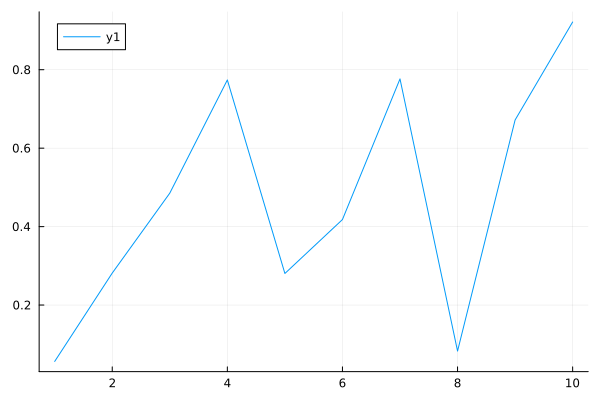

In [10]:
x = 1:10
y = rand(10)

plot(x,y)

*Your task*: Plot `B_store` and `N_store` as a function of `t_store`. Include a title and labels on the axes. Use different colors for phytoplankton and nutrient graphs.

*Note*: Use `scatter!()` to plot the nutrient line on the same graph as the phytoplankton line. Use double quotes to define text strings for the axes and the title.

Reference:

* [Julia's plot tutorial](http://docs.juliaplots.org/latest/tutorial/)

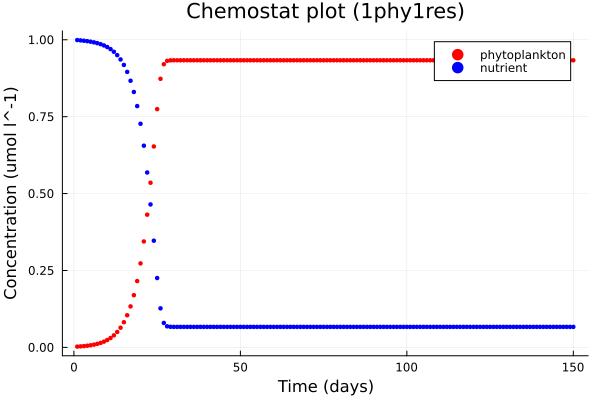

In [11]:
scatter(t_store, B_store, label = "phytoplankton", markercolor = :red, markerstrokewidth = 0, markersize = 2.5)
scatter!(t_store, N_store, label = "nutrient", markercolor = :blue, markerstrokewidth = 0, markersize = 2.5) 
xlabel!("Time (days)")
ylabel!("Concentration (umol l^-1)")
title!("Chemostat plot (1phy1res)")

## **Step 1.8: Analyze Results**

*Your task* : Summarize the behavior of the model and your observations. Modify the model parameters ($\mu$, *D*, *k*, and *max_days*) and discuss their effects on the model outcome.

`Your Analysis: ---Replace this stub---
`

*Suggested methods* :

A simple method to explore parameters is to restart the NextJournal notebook & rerun all cells after a manual edit of model parameters; you can do this repeatedly. You can also add code cells below and experiment there. A more advanced alternative is to use the `Interact.jl` package to create interactive graphs with a slider to vary parameters.

# 2. Two species of phytoplankton and one limiting resource

Next, we can simulate the growth of two species of phytoplankton with a single limiting nutrient resource. Monod kinetics yield the following equations to model the rate of change of $N$ (nutrient), $B_1$ (phytoplankton 1 biomass), $B_2$ (phytoplankton 2 biomass) over time:

$$
\frac{dN}{dt}=-\mu_{1}\frac{N}{N+k_{1}}B_1-\mu_{2}\frac{N}{N+k_{2}}B_2+D(N_{in}-N)
 \hspace{7pt} [B.1]
$$
$$
\frac{dB_1}{dt}=\mu_{1}\frac{N}{N+k_{1}}B_1-DB_1
 \hspace{115pt} [B.2]
$$
$$
\frac{dB_2}{dt}=\mu_{2}\frac{N}{N+k_{2}}B_2-DB_2
 \hspace{115pt} [B.3]
$$
In this exercise, you will use Euler's method and equations \[B.1\], \[B.2\], and \[B.3\] to model the behavior of two species of phytoplankton competing for a single limiting resource.

## Step 2.0: Import appropriate Julia packages

In [12]:
using Plots

## **Step 2.1: Set up parameters**

We want to observe the chemostat model over 5000 days with an interval of 0.1 days. The maximum growth rate is 0.301 for phytoplankton species #1 ($\mu_1$) and 0.300 for phytoplankton species #2 ($\mu_2$), the half-saturation constant ($k_1$ and $k_2$) is 0.1 in both cases, the dilution rate ($D$) is 0.2 per day, and the incoming resource concentration ($N_i$is 1.0.

*Your task*: Assign parameters to Julia variables

In [13]:
max_days = 5000
Δt = 0.1
μ₁ = 0.301
μ₂ = 0.3
k₁ = 0.1
k₂ = 0.1
D = 0.2
Nᵢ = 1.0

nstepmax = max_days/Δt
# Calculates the interval needed to plot the data points
N_out = 0.5/Δt;

## **Step 2.2: Initialize the chemostat**

Initial time ($t_0$) is 0.0 and phytoplankton concentration ($B1_0$ and $B2_0$) is 0.002 in both cases.

*Your task*: Create the variables.

In [14]:
t₀ = 0.0
B1₀ = 0.002
B2₀ = 0.002;

Later, you will create a plot of the phytoplankton and nutrient concentrations against time. After you have created the plot, you can adjust the resource and phytoplankton concentrations here and rerun the following code blocks to see how they interact.

To plot the chemostat evolution after the model has run, we want to record the chemostat state at each time step. To this end we can create four empty storage arrays.

*All of these steps have been performed for you; just push Run.*

In [15]:
#create arrays to hold data
B1_store = Float64[];
B2_store = Float64[];
N_store = Float64[];
t_store = Float64[];

**Helper function that stores the current state variables:**

*All of these steps have been performed for you; just push Run.*

In [16]:
function updateArrays_2p1r(N_step, B1, B2, N, t)
    """ Helper function that updates the arrays created in step 4. """
    let B1_store = B1_store, B2_store = B2_store, N_store = N_store, t_store = t_store, N_out = N_out

            #if phytoplankton concentration gets very small, hold constant
            (B1 < 1.0e-30) ? B1 = 1.0e-30 : nothing
            (B2 < 1.0e-30) ? B2 = 1.0e-30 : nothing

            # update variables for plotting
            # only plot at interval defined by nstep
            if mod(N_step, N_out) == 0
                #phytoplankton
                push!(B1_store, B1);
                push!(B2_store, B2);
                #resources
                push!(N_store, N);
                #time
                push!(t_store, t);
            end
    end
end

updateArrays_2p1r (generic function with 1 method)

## **Step 2.3: Create a function that calculates the change in nutrient over time**

The rate of change for the chemostat nutrient concentration will be computed by function `dNdt`. It returns the rate of change of nutrient as an output and has three inputs: the current nutrient level (*N*) and the growth rates of phytoplankton 1 (*g1*) and phytoplankton 2 (*g2*) calculated below.

*Your task*: Implement `dNdt` to replicate equation (3).

*Use the following variables*:

* **g1** and **g2** for growth rate of the phytoplankton species (first two parts of the equation, calculated in step 2.5)
* **D** (death rate)
* $N_i$ (input nutrient)
* **N** (current nutrient level)

*Hint*: You did something very similar in the previous example.

In [17]:
function dNdt(N, g1, g2)

    netSupplyRate = D * (Nᵢ-N)
    rateOfChange = -(g1+g2) + netSupplyRate

    return rateOfChange
end

dNdt (generic function with 2 methods)

## **Step 2.4: Create a function that calculates the change in biomass over time**

*Your task*: Create a function `dBdt` that takes two input parameters: the growth rate calculated during step 2.5 and the current phytoplankton concentration and returns the rate of change of phytoplankton as an output.

*Use the following variables*:

* **g** for growth rate (first part of the equation, calculated in step 2.5)
* **D** (death rate)
* **B** (phytoplankton concentration)

*Hint*: You did something very similar in the first example.

In [18]:
function dBdt(B, g)

    loss = D*B

    rateOfChange = g - loss
end

dBdt (generic function with 1 method)

## **Step 2.5: Time-step through the equations**

Use the Euler method to calculate nutrient and phytoplankton concentration iteratively throughout the chosen time period (*max_days*).

Now that we have `dNdt` and `dBdt`, we can use them along with `updateArrays_2p1r`.

*Your task*: Apply equations \[B.1\], \[B.2\], and \[B.3\] for each step in the time period.

1. The growth rate for **B1** is calculated for you below. Calculate the growth rate for **B2**. Notice that equations \[B.1\] and \[B.3\] both use this.
2. Call `dndt` and `dpdt` using the growth rates (*g1* and *g2*) and assign results to **dB1dt_temp***,* **dB2dt_temp***,* and **dNdt_temp**.
3. Use **dB1dt_temp**, **dB2dt_temp**, and **dNdt_temp**, **B**, **N**, and $\Delta t$ to step **B1**, **B2**, and **N** forward in time.
4. Increment **t** with $\Delta t$.
5. Call function `updateArrays_2p1r` to update the storage arrays.

In [19]:
let t = t₀, N = Nᵢ, B1 = B1₀, B2 = B2₀
        for N_step = 1:nstepmax

            #(5.1) calculate the growth rate
             g1 = μ₁*N/(N+k₁)*B1
             g2 = μ₂*N/(N+k₂)*B2

            #(5.2) call dNdt and dBdt
            dB1dt_temp = dBdt(B1, g1)
            dB2dt_temp = dBdt(B2, g2)
            dNdt_temp = dNdt(N, g1, g2)

            #(5.3) step p1, p2, and n forward
            B1 = B1 + dB1dt_temp * Δt
            B2 = B2 + dB2dt_temp * Δt
            N = N + dNdt_temp * Δt

            #(5.4) increase t
            t = t + Δt

            #(5.5) Call function updateArrays_2p1r()
            updateArrays_2p1r(N_step, B1, B2, N, t)
     end
 end

## **Step 2.6: Plot results**

*Your task*: Plot `B1_store`, `B2_store`, and `N_store` as a function of `t_store`. Include a title and labels on the axes. Use different colors for the phytoplankton and nutrient graphs.

*Note*: Use `scatter!()` to plot `B2_store` and `N_store` on the same graph as `B1_store`. Use double quotes to define text strings for the axes and the title.

In [20]:
scatter(t_store, B1_store, label = "phytoplankton 1", markercolor = :red, markerstrokewidth = 0, markersize = 0.7)
scatter!(t_store, B2_store, label = "phytoplankton 2", markercolor = :blue, markerstrokewidth = 0, markersize = 0.7)
scatter!(t_store, N_store, label = "nutrient", markercolor = :green, markerstrokewidth = 0, markersize = 0.7)
xlabel!("Time (days)")
ylabel!("Concentration (umol/liter)")
title!("Chemostat plot (2phy1res)")

## **Step 2.7: Analyze Results**

*Your task* : Summarize the behavior of the model and your observations. Modify the model parameters and discuss their affects on the model outcome.

`Your Analysis: ---Replace this stub--- `

*Suggested methods* :

A simple method to explore parameters is to restart the NextJournal notebook & rerun all cells after a manual edit of model parameters; you can do this repeatedly. You can also add code cells below and experiment there. A more advanced alternative is to use the `Interact.jl` package to create interactive graphs with a slider to vary parameters (see `InteractExample.ipynb`).

# 3. Two species of phytoplankton and two limiting resources

We can also simulate a model where the growth of two species of phytoplankton is limited by two resources. Monod kinetics yield the following equations to model the rate of change of $N$(nutrient 1), $P$ (nutrient 2), $B_1$ (phytoplankton 1 biomass), $B_2$ (phytoplankton 2 biomass) over time. For the purposes of this exercise, assume that nutrient 1 ($N$) is nitrate and nutrient 2 ($P$) is phosphate. 

$$
\frac{dN}{dt}=-(g_1+g_2)+D(N_{i}-N)
 \hspace{33pt} [C.1]
$$
$$
\frac{dP}{dt}=-(g_1 R_1 + g_2 R_2)+D(P_{i}-P)
 \hspace{13pt} [C.2]
$$
$$
\frac{dB_1}{dt}=-g_1-DB_1
 \hspace{88pt} [C.3]
$$
$$
\frac{dB_2}{dt}=-g_2-DB_2
 \hspace{90pt} [C.4]
$$
where

$$
g_{1}=\mu_{1}\min\left(\frac{N}{N+kn_{1}},\frac{P}{P+kp_{1}}\right)B_1


 \hspace{10pt} [C.5]
$$
$$
g_{2}=\mu_{2}\min\left(\frac{N}{N+kn_{2}},\frac{P}{P+kp_{2}}\right)B_2

 \hspace{10pt} [C.6]
$$
Notice that equation \[C.2\] is slightly different from equation \[C.1\] because it involves two new variables:  $R_1$ and $R_2$.

* $R_1$ is the ratio of resource P:resource N required by $B_1$.
* $R_2$ is the ratio of resource P:resource N required by $B_2$.

In this exercise, you will again use Euler's method and equations \[C.1\], \[C.2\], \[C.3\], and \[C.4\] to model the behavior of two species of phytoplankton with two limiting resources.

## Step 3.0: Import appropriate Julia packages

In [21]:
using Plots

**Set up the time interval:**

We want to observe the behavior of our chemostat model over the course of 150 days with an interval of 0.1 days.

In [22]:
#timestep
Δt = 0.1;

#max days
max_days = 150.0;

#number of days to timestep
nstepmax = max_days/Δt;
N_out = 0.5/Δt;

**Set up parameters:**

The incoming concentration of nutrient P ($P_i$) is found by multiplying the incoming ratio of nutrient P:nutrient N (*R_in*) by the concentration of nutrient N ($N_i$).

In [23]:
# set phyto characteristics
# growth (day -1)
μ₁ = 0.5
μ₂ = 0.5

# dilution rate (day -1)
D = 0.2

# half-saturation, K (micromol l -1)
kn₁ = 0.1
kp₁ = 0.2

kn₂ = 0.2
kp₂ = 0.1

# elemental ratios -  resource P:resource N required by phytoplankton
R₁ = 2.0
R₂ = 1.0

# incoming nutrient concentration
R_in = 1.7
Nᵢ=0.5
Pᵢ=R_in*Nᵢ;

**Initialize the chemostat and create arrays to store results:**

In [24]:
# initialization
# resources (micromol l-1)
N₀ = Nᵢ
P₀ = Pᵢ

# phytoplankton (micromol l-1)
B1₀ = 0.002
B2₀ = 0.002

#initial time = 0
t₀ = 0.0

#create arrays to hold data
B1_store = Float64[]
B2_store = Float64[]
N_store = Float64[]
P_store = Float64[]
t_store = Float64[];

## **Step 3.1: Create helper functions for time-stepping**

*Your task*: Use the following 3 cells to create helper functions that execute small sections of equations \[C.1\], \[C.2\], \[C.3\], and \[C.4\] and will be used in Step 6.

1. Function `sn` takes two input parameters (the input nutrient concentration and the current nutrient concentration) and uses the **D** global variable to return the net nutrient supply rate. This should represent $D(N_i - N)$ and $D(P_i-P)$ in equations \[C.1\] and \[C.2\], respectively.
2. Function `grow` takes five input parameters (the growth rate of phytoplankton per day $\mu$, the concentrations of nutrients **N** and **P**, the half-saturation rates **kn** and **kp**, and the concentration of phytoplankton **B**) and represents equations \[C.5\] and \[C.6\]. 
3. Function `dBdt` takes two input parameters (the growth rate calculated from the previous function and the current concentration of phytoplankton) and returns the rate of change of phytoplankton. This function represents equations \[C.3\] and \[C.4\]. You will need to use the death rate global variable **D**.

In [25]:
#(1.1)
function sn(n_in, n)
    return D*(n_in - n);
end

sn (generic function with 1 method)

In [26]:
#(1.2)
function grow(μ, N, P, kn, kp, B)
  	N_limit = N/(N+kn)
  	P_limit = P/(P+kp)
    return μ*min(N_limit,P_limit)*B;
end

grow (generic function with 1 method)

In [27]:
#(1.3)
function dBdt(grow, B)
    loss = D * B
    return grow - loss;
end

dBdt (generic function with 1 method)

**Helper function that stores the current state variables:**

In [28]:
function updateArrays_2p2r(N_step, B1, B2, N, P, t)
    let B1_store = B1_store, B2_store = B2_store, N_store = N_store, P_store = P_store, t_store = t_store, N_out = N_out
        # update variables for plotting
        if mod(N_step, N_out) == 0
            push!(B1_store, B1);
            push!(B2_store, B2);
            push!(N_store, N);
            push!(P_store, P);
            push!(t_store, t);
        end
    end
end

updateArrays_2p2r (generic function with 1 method)

## **Step 3.2: Step through the equations**

Use the Euler method to step equations through time and calculate nutrient and phytoplankton concentration iteratively throughout the time period.

Now that we have created our 3 helper functions, we can use them to find the rate of change of phytoplankton and nutrients and time step through our time period.

*Your task*: Apply equations \[C.1\], \[C.2\], \[C.3\], and \[C.4\] for each step in the time period.

1. Call `sn` to calculate the net nutrient supply rate for nutrient N. Notice that the supply rate for nutrient P has been done for you.
2. Use `grow` and `dBdt` to calculate the rate of change of phytoplankton 2 (*dB2dt_temp*) given the current nutrient levels. Notice that the rate of change of phytoplankton 1 (*dB1dt_temp*) has been implemented for you. Carefully study the code to understand what it does and then apply the same concept for phytoplankton 2.
3. Use **g1**, **g2**, and **sn_N** to carry out equation \[C.1\] and calculate the rate of change of nutrient N (*dNdt*).
4. Use **grow1**, **grow2**, **sn_P**, and the global variables $R_1$ and $R_2$ to carry out equation \[C.2\] and calculate the rate of change of nutrient B (*dPdt_temp*).
5. Use **dB1dt_temp**, **dB2dt_temp**, **dNdt_temp**, **dPdt_temp**, and $\Delta t$ with the current levels of phytoplankton and  nutrients to forward step and update the variables.
6. Call function `updateArrays_2p2r` to update your results.

In [29]:
let t = t₀, N = N₀, P = P₀, B1 = B1₀, B2 = B2₀
        for N_step = 1:nstepmax
            t = t + Δt;

            #(2.1) Calculate net nutrient supply rate (micromol l-1 day-1)
            sn_N = sn(Nᵢ, N)
            sn_P = sn(Pᵢ, P)

            # Calculating dB1dt:
            g1 = grow(μ₁, N, P, kn₁, kp₁, B1)
            dB1dt_temp = dBdt(g1, B1)


            #(2.2) Calculate dB2dt
            g2 = grow(μ₂, N, P, kn₂, kp₂, B2)
            dB2dt_temp = dBdt(g2, B2)

            #(2.3) Calculate dAdt
            dNdt_temp = - (g1+g2) + sn_N

            #(2.4) Calculate dPdt
            dPdt_temp = - (g1*R₁ + g2*R₂) + sn_P

            #(2.5) forward step
            B1 = B1 + dB1dt_temp * Δt
            B2 = B2 + dB2dt_temp * Δt
            N = N + dNdt_temp * Δt
            P = P + dPdt_temp * Δt


            #(2.6) Call function updateArrays_2p2r()
            updateArrays_2p2r(N_step, B1, B2, N, P, t)
        end
    end

## **Step 3.3: Plot results**

*Your task*: Plot **B1_store**, **B2_store**, **N_store**, and **P_store** as a function of **t_store**. Include a title and labels on the axes. Use different colors for the phytoplankton and nutrient graphs.

*Note*: Use `scatter!()` to plot the nutrient line on the same graph as the phytoplankton line. Use double quotes to define text strings for the axes and the title.

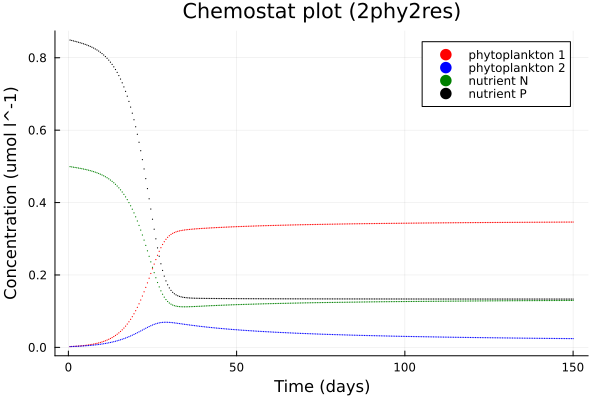

In [30]:
scatter(t_store, B1_store, label = "phytoplankton 1", markercolor = :red, markerstrokewidth = 0, markersize = 0.7)
scatter!(t_store, B2_store, label = "phytoplankton 2", markercolor = :blue, markerstrokewidth = 0, markersize = 0.7)
scatter!(t_store, N_store, label = "nutrient N", markercolor = :green, markerstrokewidth = 0, markersize = 0.7)
scatter!(t_store, P_store, label = "nutrient P", markercolor = :black, markerstrokewidth = 0, markersize = 0.7)
xlabel!("Time (days)")
ylabel!("Concentration (umol l^-1)")
title!("Chemostat plot (2phy2res)")

## **Step 3.4: Analyze Results**

*Your task* : Summarize the behavior of the model and your observations. Modify the model parameters and discuss their affects on the model outcome.

`Your Analysis: ---Replace this stub--- `

*Suggested methods* :

A simple method to explore parameters is to restart the NextJournal notebook & rerun all cells after a manual edit of model parameters; you can do this repeatedly. You can also add code cells below and experiment there. A more advanced alternative is to use the `Interact.jl` package to create interactive graphs with a slider to vary parameters.